# Evrişimsel Sinir Ağları'na Giriş

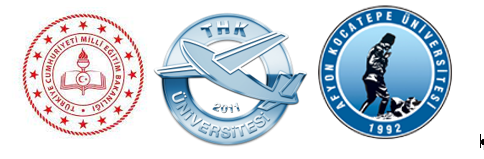

In [11]:
#Import library
from IPython.display import Image
Image(filename = "imgs/katilimcilar.png", width = 300)

### DNN MNIST

In [2]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 28, 28, 64)        128       
_________________________________________________________________
dense_8 (Dense)              (None, 28, 28, 32)        2080      
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                250890    
Total params: 253,098
Trainable params: 253,098
Non-trainable params: 0
_________________________________________________________________


In [11]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 82s 192ms/step - loss: 0.6619 - accuracy: 0.8286 - val_loss: 0.2463 - val_accuracy: 0.9330
Epoch 2/15
422/422 [==============================] - 86s 205ms/step - loss: 0.3039 - accuracy: 0.9120 - val_loss: 0.2320 - val_accuracy: 0.9348
Epoch 3/15
422/422 [==============================] - 86s 203ms/step - loss: 0.2977 - accuracy: 0.9154 - val_loss: 0.2306 - val_accuracy: 0.9353
Epoch 4/15
422/422 [==============================] - 91s 215ms/step - loss: 0.2827 - accuracy: 0.9191 - val_loss: 0.2236 - val_accuracy: 0.9360
Epoch 5/15
422/422 [==============================] - 88s 208ms/step - loss: 0.2808 - accuracy: 0.9194 - val_loss: 0.2246 - val_accuracy: 0.9383 - loss: 0.2
Epoch 6/15
422/422 [==============================] - 86s 204ms/step - loss: 0.2704 - accuracy: 0.9235 - val_loss: 0.2216 - val_accuracy: 0.9363
Epoch 7/15
422/422 [==============================] - 88s 208ms/step - loss: 0.2627 - accuracy: 0.9245 - val_loss: 0.2

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.24949589371681213
Test accuracy: 0.9305999875068665


### Küçük bir evrişimsel sinir ağı oluşturmak

In [13]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)


- Evrişimli sinir ağları (image_height, image width, image_channels) şeklinde girdi beklerler.
- Bizim durumumuzda (28, 28, 1) şeklinde MNIST resimleriyle aynı şekildedir.

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)              0     

- Tüm Conv2D ve MaxPooling2D katmanlarının çıktıları (height, width, channels) şeklinde 3B tensör olmaktadır.
- Dense sınıflandırıcıları vektörlerle işlem yapabilir. Fakat en son konvolüsyon katmanındaki çıktımız (3,3,128) şeklinde 3B bir tensör. Bu nedenle Dense katmanından önce Flatten kullanıyoruz. (1152,) boyutuna düzleştiriyoruz.
- Son katmanda 10 sınıf olduğu için Dense katmanında 10 kullanıyoruz.

### Evrişimsel Sinir Ağını MNIST verisetinde eğitmek

In [15]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 69s 70ms/step - loss: 0.3773 - accuracy: 0.8774
Epoch 2/5
938/938 [==============================] - 79s 84ms/step - loss: 0.0455 - accuracy: 0.9857
Epoch 3/5
938/938 [==============================] - 71s 76ms/step - loss: 0.0298 - accuracy: 0.9906
Epoch 4/5
938/938 [==============================] - 71s 76ms/step - loss: 0.0213 - accuracy: 0.9931
Epoch 5/5
938/938 [==============================] - 72s 77ms/step - loss: 0.0174 - accuracy: 0.9943


In [16]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc:.3f}")

313/313 [==============================] - 3s 10ms/step - loss: 0.0275 - accuracy: 0.9909
Test accuracy: 0.991


### Evrişim

![ ](imgs/cnn1.png)

- Dense katmanı ile evrişim katmanı arasındaki fark şudur: Dense katmanı kendi girdilerinin nitelik uzayındaki global örüntüleri öğrenirken Conv2D katmanı bölgesel örüntüleri öğrenir.

- Öğrendiği örüntüler yön değiştirmezdir. Yani resmin sol alt köşesinde öğrendiği bir örüntüyü heryerde tanıyabilir. Dense katmanı ise farklı bir bölgede karşılaştığı örüntüyü tekrar öğrenmelidir. Bu yğzden görüntü işlemede Conv2D vazgeçilmezdir. Daha az veri ile geneleştirme gücü yüksek gösterimler öğrenebilir.

![ ](imgs/spatial.png)

- Uzamsal hiyerarşileri öğrenebilir. Örneğin ilk Conv katmanında köşeler gibi küçük bölgesel örüntüleri öğrenirken ikinci Conv katmanındadaha geniş örüntüler öğrenir. Görsel dünyada görüntüler arası uzamsal hiyerarşi vardır. Lokal köşeler birleşrek göz kulak gibi nesneleri, nesneler birleşerek kedi gibi kavramı öğrenebilir.

- Evrişim 3B tensör üzerinde işlem yapar. Bu tensörler nitelik haritası adını alır. Genişlik, yükseklik gibi iki uzamsal ekseni ile derinliği (kanal) vardır. 

- RGB, 3 renk olduğu için derinlik 3'tür. Evrişim işlemi nitelik haritasından öznitelik haritası üretir (feature map). Feature map genişlik, yükseklik ve derinlik bilgisini tutan 3B bir tensördür. Burada dernlik RGB gibi resmin kanallarını değil filtre adı verilen yapılardır. Yüz bilgisi yüksek seviye bilgileri kodlar.

- Evrişimde iki anahtar parametre vardır: Filtre boyutu (3x3, 5x5 gibi),  filtre sayısı (32, 64 gibi)

![ ](imgs/conv.png)

- Çıktının genişliği ve yüksekliği girdinin genişliği ve yüksekliğinden farklı olabilir. Bunun iki nedeni vardır: kenar etkisi (nitelik haritasında doldurma (padding) ile çözülebilir), adım aralığı (striding)

### Doldurma (padding) ve adım aralığı (striding)

![ ](imgs/padding.png)

- Eğer girdi ile çıktı nitelik haritalarının aynı boyutta olması isteniliyorsa padding kullanılmalı.
- padding parametresinde valid=doldurma olmaması, same=girdi ile çıktı aynı olması anlamındadır. Varsayılan valid'dir

- Adım aralığının 2 olması nitelik haritasının 1/2 oranında küçülmesi anlamına gelir. Varsayılan 1'dir

### MaxPooling

![ ](imgs/striding.png)

- Adımlı evrişim gibi nitelik haritalarının boyutunu küçültür.
- Girdi nitelik haritasından pencereler çıkarıp her kanalın en büyük değerini alır.

In [17]:
inputs = keras.Input(shape=(28, 28, 1))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same")(inputs)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model_no_max_pool = keras.Model(inputs=inputs, outputs=outputs)

model_no_max_pool.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
flatten_3 (Flatten)          (None, 61952)             0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                619530    
Total params: 712,202
Trainable params: 712,202
Non-trainable params: 0
_____________________________________________________

- 2 nedenden dolayı mutlaka kullanılmalıdır:
    - Uzamsal hiyerarşileri öğrenmek için kullanılır. Eğer kullanılmazsa sonraki evrişim katmanlarındaki yüksek seviyeli örüntüler küçük kalacaktır. Dolayısıyla rakamları sınıflandıramayacaktır. Oysa son evrişim katmanları girdinin tamamı hakkında bilgi sahibi olmalı.
    - Boyut küçültme için kullanılır. Eğer kullanılmazsa son nitelik haritalarının parametre katsayıları çok yüksek olur. (22x22x128=73856  gibi) Eğer 512 Dense konulursa 35 milyon parametre olur ki, böyle küçük bir model için çok yüksek bir değer. Overfitting ile sonuçlanabilir.  
- Boyut küçültme için adım sayısı da artırılabilir.
- MaxPool yerine AveragePool da kullanılabilir. Fakat MaxPool daha başarılı. Çünkü en büyüklerin biriktirilmesi, ortalamaların biriktirilmesinden daha fazla bilgi taşıyor.

## Küçük verisetinde Evrişimsel Sinir Ağları

- Küçük veriseti örneğe göre değişebilir. Birkaç yüz de olabilir, birkaç onbin de olabilir.
- 2000 kedi, 200 köpek resmi olan 4000 resimlik versetimizin, 2000 training 1000 validation 1000 test için kullanacağız.
- Küçük bir Evrişimsel Sinir Ağı ile, Data Augmentation ile, Feature Extraction ile, Fine Tuning ile denemeler yapacağız. 
- Derin öğrenmenin temel özelliklerinden birisi de öznitelik çıkarmadan kullanışlı örüntüleri kendi öğrenmesidir. Ancak bu verinin çok olmasına bağlıdır. Özellikle resimler için.
- Birkaç düzine veriyle Evrişimsel Sİnir ağında bir problem çözülemez. Ama küçük ve iyi düzenlileştirilmiş bir ağ ile birkaç yüz veri yeterlidir. 

### 1. Küçük Bir Evrişimsel Sinir Ağı

In [18]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("catsdogs")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2500)

In [19]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.experimental.preprocessing.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [20]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 41, 41, 128)       7385

In [21]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [22]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


- callback, eğitimin çeşitli aşamalarında eylemler gerçekleştirebilen bir nesnedir. Fit nesnesiyle kullanılır. (https://keras.io/api/callbacks/)
- Modelinizi periyodik olarak diske kaydeder.
- Erken durdurma yapar.
- Öğrenim oranına göre zamanlar.
- Eğitim sırasında bir modelin dahili durumları ve istatistikleri hakkında bir görünüm elde edin

In [25]:
#####
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=10),
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 236s 4s/step - loss: 0.6958 - accuracy: 0.5075 - val_loss: 0.6947 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 243s 4s/step - loss: 0.7557 - accuracy: 0.5520 - val_loss: 0.6699 - val_accuracy: 0.5640
Epoch 3/30
63/63 [==============================] - 248s 4s/step - loss: 0.6774 - accuracy: 0.5835 - val_loss: 0.6520 - val_accuracy: 0.6030
Epoch 4/30
63/63 [==============================] - 250s 4s/step - loss: 0.6762 - accuracy: 0.6215 - val_loss: 0.6031 - val_accuracy: 0.6730
Epoch 5/30
63/63 [==============================] - 254s 4s/step - loss: 0.6066 - accuracy: 0.6790 - val_loss: 0.6263 - val_accuracy: 0.6320
Epoch 6/30
63/63 [==============================] - 255s 4s/step - loss: 0.5781 - accuracy: 0.7010 - val_loss: 0.5609 - val_accuracy: 0.7080
Epoch 7/30
63/63 [==============================] - 267s 4s/step - loss: 0.5468 - accuracy: 0.7235 - val_loss: 0.5496 - val_accuracy: 0.7420
Epoch 8/30
63

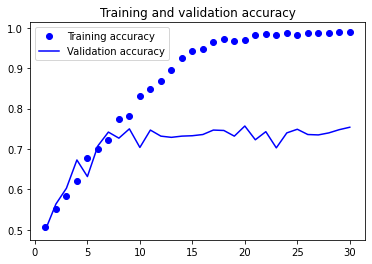

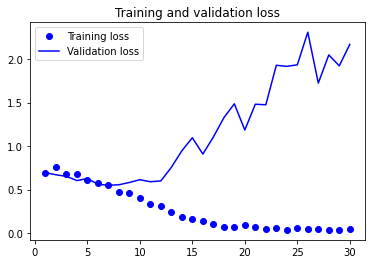

In [26]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)

plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#### Grafik Yorumlama

![ ](imgs/overfitting1.PNG)
![ ](imgs/overfitting2.PNG)

In [27]:
test_model = keras.models.load_model("convnet_from.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 75s 1s/step - loss: 0.5681 - accuracy: 0.7205
Test accuracy: 0.720


### 2. Data Augmentation

- Az miktarda veya tekdüze veriye sahipsek bu durumda modelimizde ezberleme (overfitting) problemi ile karşılaşırız. Bu durumla karşılaşmamak ve modelimizin iyi bir şekilde öğrenip, performansını artırmak için veri artırma yöntemlerine başvurulur.
- Çevrimçi ve çevrimdışı data augmentation vardır.

![ ](imgs/dataaug.png)

In [28]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.2),
    ]
)

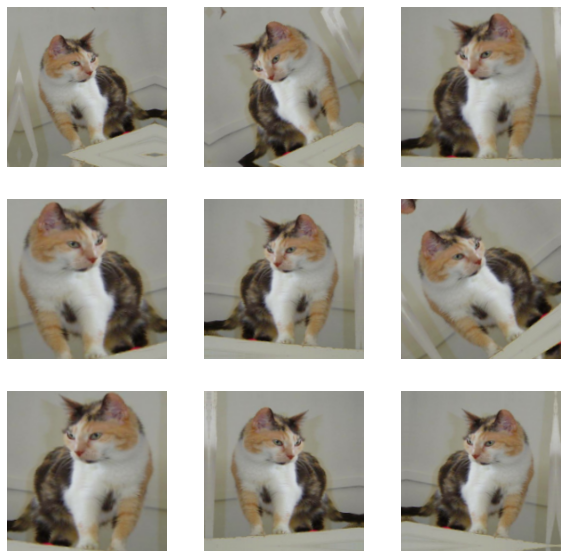

In [29]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [31]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.experimental.preprocessing.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [32]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 247s 4s/step - loss: 0.8209 - accuracy: 0.4996 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 257s 4s/step - loss: 0.7054 - accuracy: 0.5205 - val_loss: 0.6872 - val_accuracy: 0.5440
Epoch 3/30
63/63 [==============================] - 260s 4s/step - loss: 0.6960 - accuracy: 0.5629 - val_loss: 0.7095 - val_accuracy: 0.5070
Epoch 4/30
63/63 [==============================] - 262s 4s/step - loss: 0.6750 - accuracy: 0.5922 - val_loss: 0.6494 - val_accuracy: 0.6070
Epoch 5/30
63/63 [==============================] - 262s 4s/step - loss: 0.6702 - accuracy: 0.6084 - val_loss: 0.6388 - val_accuracy: 0.6290
Epoch 6/30
63/63 [==============================] - 263s 4s/step - loss: 0.6492 - accuracy: 0.6282 - val_loss: 0.6154 - val_accuracy: 0.6610
Epoch 7/30
63/63 [==============================] - 265s 4s/step - loss: 0.6232 - accuracy: 0.6654 - val_loss: 0.5733 - val_accuracy: 0.6930
Epoch 8/30
63

In [33]:
test_model = keras.models.load_model(
    "convnet_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 65s 1s/step - loss: 0.4770 - accuracy: 0.7920
Test accuracy: 0.792


### Öneğitimli Ağ

- Daha önce büyük bir verisetinde genellikle de büyük ölçekli resim sınıflandırmada eğitilip kaydedilmiş ağdır.
- Eğer yeterince büyük ve genel bir verisetiyse uzamsalhiyerarşileri öğrenmiştir. Elinizdeki görev sınıfları tamamen farklı olsa bile uyarlanabilir. 
- ImageNet sınıfı çoğu hayvanlar ve günlük hayatta kullandığımız 1000 adet sınıfa ait 1.4 milyon adet resim vardır.
- Öğrenilen niteliklerin taşınması derin öğrenmeyi eski sığ ağlardan ayıran en temel özelliklerden birisidir.

### 3. Feature Extraction

- Modelimiz Conv2D+MaxPool ile Dense blok grupları olarak 2 grup ögeden oluşmaktadır.
- Evrişim blokları nesnelere ait kavramları görevden bağımsız öğrenir. Ama sınıflandırıcı grubu sınıfa özel gösterimleri öğrenir. Yani resimde o nesnenin bulunup bulunmama olasılığını öğrenir.
- Sınıflandırıcı blokları nesnenin yeriyle ilgili bilgi bulundurmaz. Evrişim katmanları bu bilgiyi tutar. Özellikle nesnenin yeriyle ilgili problemlerde Dense tamamen başarısızdır.
- Elimizde veriseti öneğitilmiş verisetinden çok farklıysa tüm evrişim katmanını kullanmak yerine, bilk birkaç katman öznitelik çıkarımı için kullanılabilir.
- Kullanılabilecek öneğitimli modeller: XCeption, VGG16, VGG19, Resnet, Inception, MobileNet, DenseNet, Nasnet

1. Bir temel model oluşturun ve önceden eğitilmiş ağırlıkları ona yükleyin.
2. Yeni veri kümenizi bunun üzerinden çalıştırın ve temel modelden bir (veya birkaç) katmanın çıktısını kaydedin. Buna özellik çıkarma denir .
3. Bu çıktıyı yeni, daha küçük bir model için girdi verileri olarak kullanın.

- Önemli bir avantajı, temel modeli her epoch'da bir kez değil, verilerinizde yalnızca bir kez çalıştırmanızdır. Yani çok daha hızlı ve daha ucuz.
- Dezavantajı data augmentation yaparken gerekli olan eğitim sırasında yeni modelinizin giriş verilerini dinamik olarak değiştirmenize izin vermemesidir. 

### a. Data Augmentation olmadan Feature Extraction

In [4]:
import keras
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False, # Dense bloğunun dahil olup olmadığını belirler
    input_shape=(180, 180, 3))

In [5]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [38]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [37]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 7s 81ms/step - loss: 22.1953 - accuracy: 0.8793 - val_loss: 3.4258 - val_accuracy: 0.9750
Epoch 2/20
63/63 [==============================] - 5s 75ms/step - loss: 1.9016 - accuracy: 0.9839 - val_loss: 5.0690 - val_accuracy: 0.9710
Epoch 3/20
63/63 [==============================] - 5s 76ms/step - loss: 2.4387 - accuracy: 0.9876 - val_loss: 7.8922 - val_accuracy: 0.9650
Epoch 4/20
63/63 [==============================] - 5s 74ms/step - loss: 2.1064 - accuracy: 0.9871 - val_loss: 7.4098 - val_accuracy: 0.9600
Epoch 5/20
63/63 [==============================] - 5s 74ms/step - loss: 0.6262 - accuracy: 0.9940 - val_loss: 6.3291 - val_accuracy: 0.9670
Epoch 6/20
63/63 [==============================] - 5s 74ms/step - loss: 0.7149 - accuracy: 0.9967 - val_loss: 8.7822 - val_accuracy: 0.9650
Epoch 7/20
63/63 [==============================] - 5s 74ms/step - loss: 0.4791 - accuracy: 0.9952 - val_loss: 5.8308 - val_accuracy: 0.9750
Epoch 8/20
6

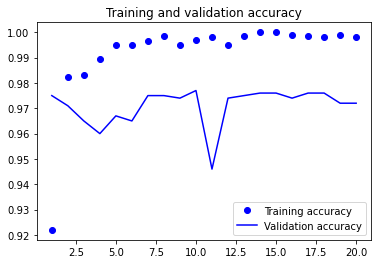

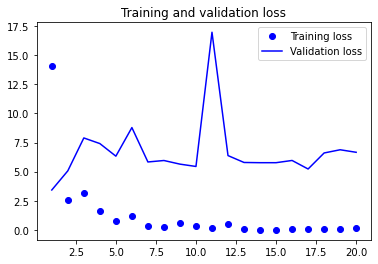

In [39]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

### b.Data Augmentation ile Feature Extraction

In [40]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False ##

In [41]:
conv_base.trainable = True
print("Dondurmadan önce eğitilebilir ağırlık sayısı:", len(conv_base.trainable_weights))

Dondurmadan önce eğitilebilir ağırlık sayısı: 26


In [42]:
conv_base.trainable = False
print("Dondurmadan sonra eğitilebilir ağırlık sayısı", len(conv_base.trainable_weights))

Dondurmadan sonra eğitilebilir ağırlık sayısı 0


In [44]:
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.1),
        layers.experimental.preprocessing.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [45]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 1696s 27s/step - loss: 32.0281 - accuracy: 0.8194 - val_loss: 3.6598 - val_accuracy: 0.9640
Epoch 2/50
63/63 [==============================] - 1819s 29s/step - loss: 6.4827 - accuracy: 0.9468 - val_loss: 5.3355 - val_accuracy: 0.9630
Epoch 3/50
63/63 [==============================] - 1858s 30s/step - loss: 6.0119 - accuracy: 0.9461 - val_loss: 3.9157 - val_accuracy: 0.9680
Epoch 4/50
63/63 [==============================] - ETA: 0s - loss: 5.1016 - accuracy: 0.9612 

KeyboardInterrupt: 

In [46]:
test_model = keras.models.load_model(
    "feature_extraction_with_data_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 1174s 19s/step - loss: 5.9822 - accuracy: 0.9605
Test accuracy: 0.961


### 4. Fine Tuning (Transfer Learning)

![ ](imgs/finetuning.png)

- Dondurulmuş bir modelin üstten birkaç katmanının çözülmesi ve yeni eklenen katmanlarla beraber eğitilmesidir.
- Yeniden kulanılan modelden elimizdeki görevle ilgili soyut gösterimler öğrenmeye başladığı için hassas ayar denilir.
- Dondurma işlemi trainable parametresi ile yapılır. False ayarlanırsa ağırlıklar güncellenmez dondurulmuş olur. 
- Genel olarak, tüm ağırlıklar eğitilebilir ağırlıklardır. Eğitilemez ağırlıklara sahip tek yerleşik katman BatchNormalization katmandır (2 eğitilebilir 2 eğitilemez ağırlık vardır). Eğitim sırasında girdilerinin ortalamasını ve varyansını takip etmek için eğitilemez ağırlıklar kullanır.
- Dense katmanında bir ağırlık bir bias olmak üzere 2 eğitilebilir ağırlık vardır.

1. Önceden eğitilmiş bir modelden katmanlar alın.
2. Gelecekteki eğitim turlarında içerdikleri herhangi bir bilgiyi yok etmemek için onları dondurun.
3. Dondurulmuş katmanların üzerine yeni, eğitilebilir katmanlar ekleyin. Eski özellikleri yeni bir veri kümesi üzerinde tahminlere dönüştürmeyi öğrenecekler.
4. Yeni katmanları veri kümenizde eğitin.

In [47]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [6]:
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
    layer.trainable = False

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="fine_tuning.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

### Görselleştirme

- Sinir ağı terminolojisinde, öğrenilen filtreler basitçe ağırlıklardır, ancak filtrelerin özel iki boyutlu yapısı nedeniyle, ağırlık değerleri birbiriyle uzamsal bir ilişkiye sahiptir ve her filtreyi iki boyutlu bir görüntü olarak çizmek anlamlıdır.
- model.summary() ortaya çıkan özellik haritalarının şeklini özetler. Ağdaki filtrelerin (ağırlıkların) şekli hakkında herhangi bir fikir vermez, yalnızca katman başına toplam ağırlık sayısını verir.
- model.layers özelliği ile modelin tüm katmanlarına erişebiliriz .
- Her katmanın bir layer.name özelliği vardır, burada evrişimli katmanlar conv_block# gibi bir adlandırma evrişimine sahiptir , burada ' # ' bir tam sayıdır. Bu nedenle, her katmanın adını kontrol edebilir ve ' conv ' dizesini içermeyenleri atlayabiliriz.
- Her evrişim katmanının iki ağırlık seti vardır. Biri filtre bloğu, diğeri ise bias değerleri bloğu. Bunlara layer.get_weights() işlevi aracılığıyla erişilebilir

In [1]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

In [11]:
model = conv_base
# summarize feature map shapes
for i in range(len(model.layers)):
    layer = model.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)
    
ixs = [1,2]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

1 block1_conv1 (None, 180, 180, 64)
2 block1_conv2 (None, 180, 180, 64)
4 block2_conv1 (None, 90, 90, 128)
5 block2_conv2 (None, 90, 90, 128)
7 block3_conv1 (None, 45, 45, 256)
8 block3_conv2 (None, 45, 45, 256)
9 block3_conv3 (None, 45, 45, 256)
11 block4_conv1 (None, 22, 22, 512)
12 block4_conv2 (None, 22, 22, 512)
13 block4_conv3 (None, 22, 22, 512)
15 block5_conv1 (None, 11, 11, 512)
16 block5_conv2 (None, 11, 11, 512)
17 block5_conv3 (None, 11, 11, 512)


- Görüntü PIL nesnesinin bir NumPy piksel verisi dizisine dönüştürülmesi gerekir. (img_to_array)
- 3B diziden 4B diziye [ örnekler, satırlar, sütunlar, kanallar ] genişletilmesi gerekir. (expand_to_dims)
- VGG için uygun boyutlara getirilmelidir. (preprocess_input)

In [9]:
img = load_img('catsdogs/train/cat/cat.1.jpg', target_size=(180, 180))

img = img_to_array(img)
img = expand_dims(img, axis=0)
img = preprocess_input(img)
feature_maps = model.predict(img)


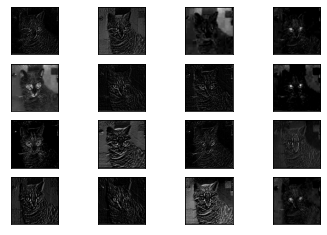

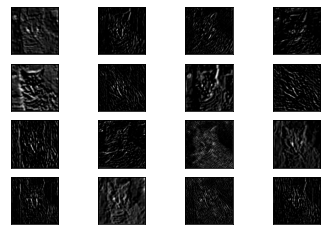

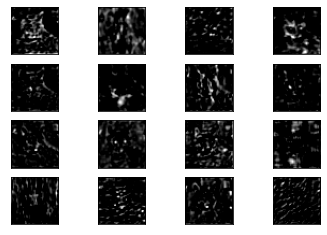

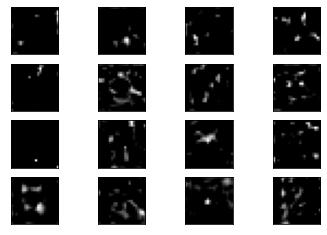

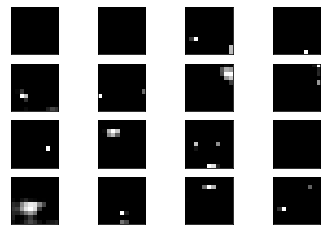

In [12]:
square = 4
for fmap in feature_maps:
    ix = 1
    for _ in range(square):
        for _ in range(square):
            ax = pyplot.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
            ix += 1
    pyplot.show()

- Koyu kareler küçük veya engelleyici ağırlıkları, açık kareler ise büyük veya uyarıcı ağırlıkları temsil eder. 
